# Song Popularity Regression Model
# Authors: 

**Original Dataset Source: https://www.kaggle.com/datasets/yasserh/song-popularity-dataset**

# Dataset Description

**Attributes in the dataset:**

1. acousticness: A confidence measure from 0.0 to 1.0 of how acoustic the track is
2. danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity
3. duration_ms: Song duration in ms
4. energy: represents a perceptual measure of intensity and activity
5. instrumentalness: predicts whether a track contains no vocals (1.0 means the song has no vocal content)
6. key: the key the song is in
7. liveness: detects the presence of a live audience in the recording
8. loudness: overall average loudness of the song in decibels
9. mode: the modality of the song's scale; 2 categories; major is represented by "1" and minor by "0"
10. speechiness: the presence of spoken words in a song
11. tempo: overall estimated tempo of a track in beats per minute
12. time_signature: estimated time signature of the song

In [3]:
# Libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [4]:
url = "https://raw.githubusercontent.com/mahnsi/group22finalproject/main/song_data.csv"
songs = pd.read_csv(url, sep=',')
songs_backup = songs
songs

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [5]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


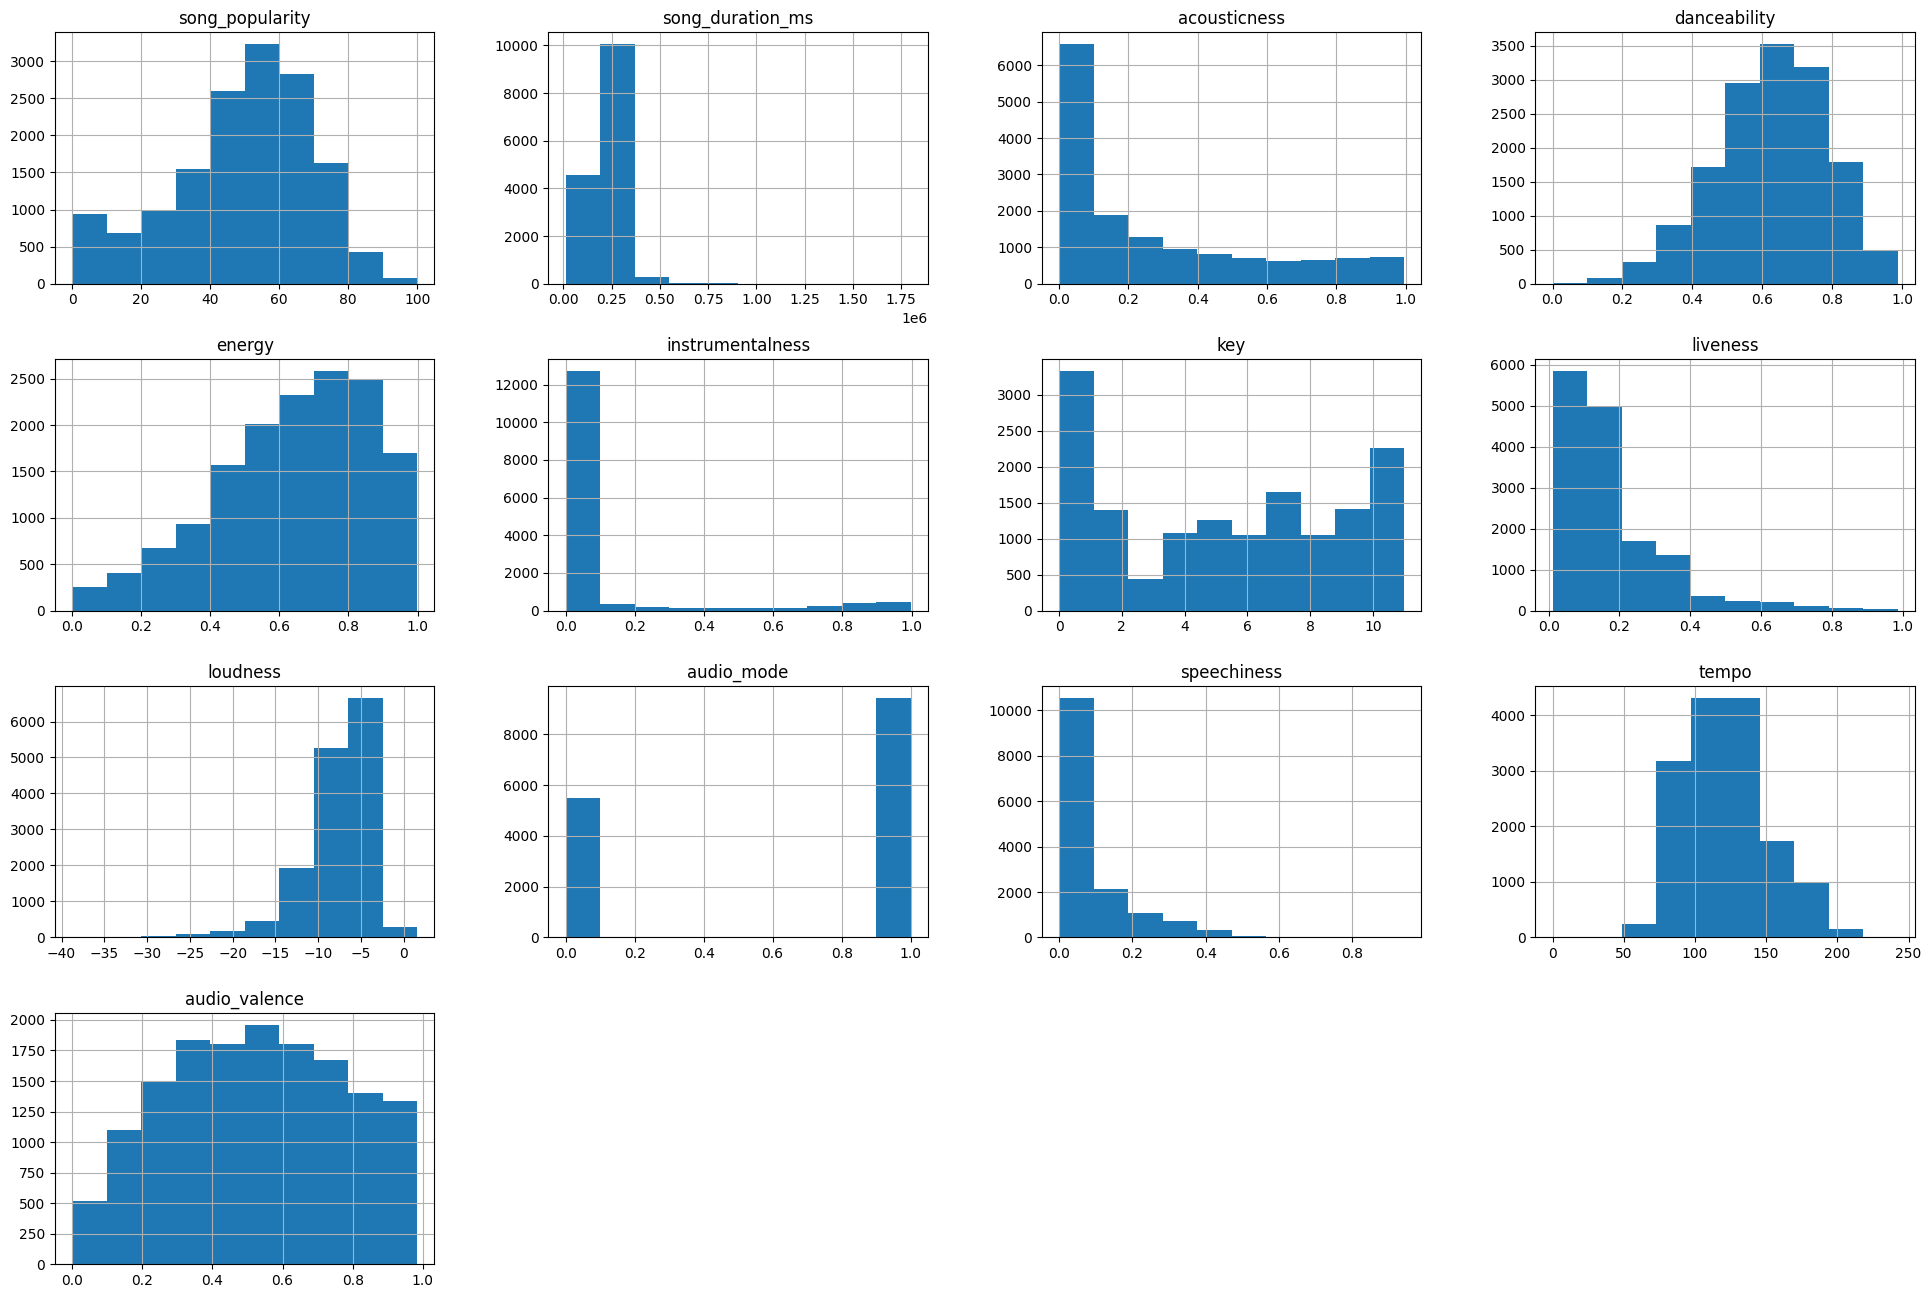

In [29]:
songs.hist(figsize=(24, 16))
plt.show()

Checking for correlation between using pearsons coefficient

In [7]:
corr_matrix = songs.corr(numeric_only=True)
corr_matrix

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558


Which values most correlate with our target

In [8]:
corr_matrix["song_popularity"].sort_values(ascending=False)

song_popularity     1.000000
danceability        0.104290
loudness            0.099442
time_signature      0.034983
speechiness         0.021479
energy              0.001365
audio_mode         -0.004969
key                -0.013160
song_duration_ms   -0.018899
tempo              -0.022672
liveness           -0.038937
audio_valence      -0.052895
acousticness       -0.065181
instrumentalness   -0.130907
Name: song_popularity, dtype: float64

There is little positive correlation with the target and 'danceability'
Some negative correlation with target and 'instrumentalness'

Text(0, 0.5, 'song_popularity')

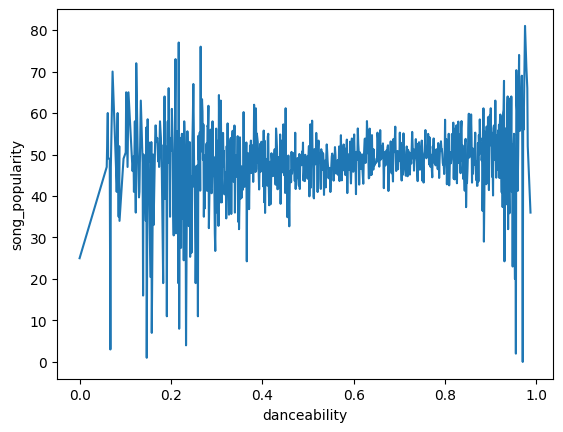

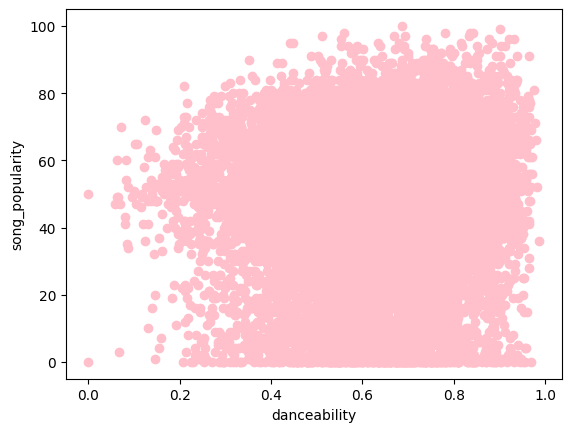

In [31]:
#plot song_popularity vs. danceability
g = sns.lineplot(x="danceability", y="song_popularity", data=songs, errorbar=None)


# Scatterplot for song_popularity and danceability
X = songs["danceability"]
y = songs["song_popularity"]

# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'pink')
plt.xlabel("danceability")
plt.ylabel("song_popularity")

Text(0, 0.5, 'song_popularity')

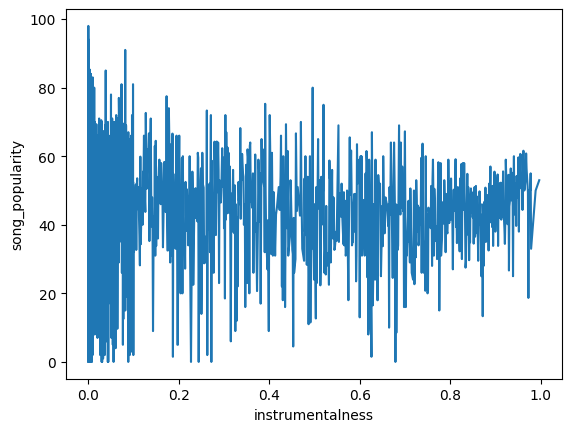

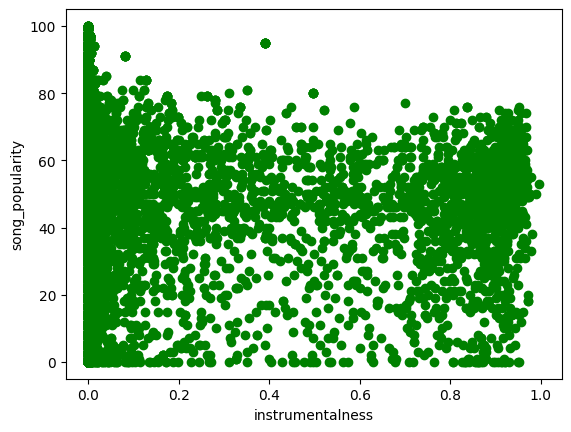

In [10]:
#plot song_popularity vs. instrumentalness
g = sns.lineplot(x="instrumentalness", y="song_popularity", data=songs, errorbar=None)


# Scatterplot for song_popularity and danceability
X = songs["instrumentalness"]
y = songs["song_popularity"]

# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'g')
plt.xlabel("instrumentalness")
plt.ylabel("song_popularity")

# Prepare data

In [11]:
# Check for duplicate rows and display them
songs[(songs.duplicated())]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
173,Sex on Fire,81,203346,0.00172,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374
179,Use Somebody,79,230760,0.00552,0.276,0.715,0.000417,0,0.2010,-5.356,1,0.0432,137.028,4,0.173
212,Hips Don't Lie,84,218093,0.28400,0.778,0.824,0.000000,10,0.4050,-5.892,0,0.0712,100.024,4,0.756
414,Hotel California - Remastered,83,391376,0.00574,0.579,0.508,0.000494,2,0.0575,-9.484,1,0.0270,147.125,4,0.609
421,Me and Bobby McGee,69,271333,0.30200,0.453,0.464,0.000060,2,0.1520,-10.960,1,0.0431,93.190,4,0.658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18797,The Time I've Wasted,63,213249,0.79600,0.473,0.250,0.000088,5,0.1010,-11.263,1,0.0304,145.027,4,0.261
18811,Oceans,69,216186,0.27400,0.404,0.480,0.000009,9,0.1320,-8.906,0,0.0303,129.162,3,0.200
18817,Life Is Confusing,64,171413,0.95500,0.373,0.216,0.001050,1,0.0739,-11.410,1,0.0326,129.030,4,0.496
18826,Call It Dreaming,67,231760,0.61000,0.519,0.515,0.000057,5,0.1070,-9.448,1,0.0310,80.329,4,0.714


In [12]:
#3909 duplicate rows. remove duplicated
songs.drop_duplicates(inplace=True)

In [13]:
# If no key was detected, the value is -1. check for missing key.
count = songs['key'].value_counts().get(-1, 0)
count

0

In [14]:
# Find the number of missing values in each column
songs.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [15]:
# Drop time signature attribute

songs = songs.drop('time_signature', axis=1)

In [16]:
from sklearn.preprocessing import OneHotEncoder